In [55]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from bioinfokit.visuz import cluster

In [65]:
df=pd.read_csv('europe.csv')
dfWNames=df.copy()
df = df[df.columns[1:8]]
df.head()

,Area,GDP,Inflation,Life.expect,Military,Pop.growth,Unemployment
0,83871,41600,3.5,79.91,0.80,0.03,4.2
1,30528,37800,3.5,79.65,1.30,0.06,7.2
2,110879,13800,4.2,73.84,2.60,-0.80,9.6
3,56594,18000,2.3,75.99,2.39,-0.09,17.7
4,78867,27100,1.9,77.38,1.15,-0.13,8.5


In [75]:
print(df.columns)
print(dfWNames.iloc[:,0])

Index(['Area', 'GDP', 'Inflation', 'Life.expect', 'Military', 'Pop.growth',
       'Unemployment'],
      dtype='object')
0            Austria
1            Belgium
2           Bulgaria
3            Croatia
4     Czech Republic
5            Denmark
6            Estonia
7            Finland
8            Germany
9             Greece
10           Hungary
11           Iceland
12           Ireland
13             Italy
14            Latvia
15         Lithuania
16        Luxembourg
17       Netherlands
18            Norway
19            Poland
20          Portugal
21          Slovakia
22          Slovenia
23             Spain
24            Sweden
25       Switzerland
26           Ukraine
27    United Kingdom
Name: Country, dtype: object


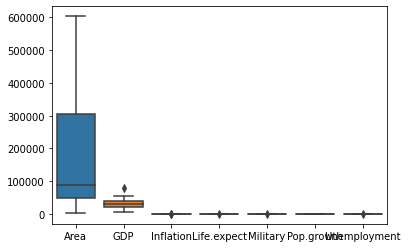

In [58]:
sns.boxplot(data=df)
plt.show()

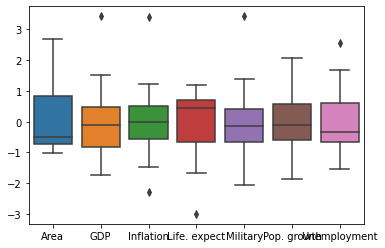

In [59]:
x=StandardScaler().fit_transform(df)
namedBoxplot= pd.DataFrame(data=x,columns=["Area","GDP","Inflation","Life. expect","Military","Pop. growth","Unemployment"])
sns.boxplot(data=namedBoxplot)
plt.show()

In [67]:
pca=PCA(n_components=7)
PC=pca.fit_transform(x)
#print(pca.singular_values_)
#print(pca.explained_variance_)
print(PC.shape)
print(pca.components_[0])
print(pca.components_)

#igol = pd.DataFrame(x,columns=["Area","GDP","Inflation","Life. expect","Military","Pop. growth","Unemployment"])
#igol.head()

(28, 7)
[ 0.1248739  -0.50050586  0.40651815 -0.48287333  0.18811162 -0.47570355
  0.27165582]
[[ 1.24873902e-01 -5.00505858e-01  4.06518155e-01 -4.82873325e-01
   1.88111616e-01 -4.75703554e-01  2.71655820e-01]
 [-1.72872202e-01 -1.30139553e-01 -3.69657243e-01  2.65247797e-01
   6.58266888e-01  8.26219831e-02  5.53203705e-01]
 [ 8.98296740e-01  8.39557607e-02  1.98194675e-01  2.46082460e-01
   2.43679433e-01  1.63697207e-01  5.00135736e-04]
 [ 4.48503976e-02 -8.42554739e-02  1.64685649e-01  2.67714373e-02
  -5.62374796e-01  3.92462767e-01  7.01967912e-01]
 [-3.24016926e-01  3.90632444e-01  6.89500539e-01 -1.01786561e-01
   3.68147581e-01  3.47867772e-01  1.01587422e-02]
 [ 1.90118083e-01  6.38657073e-01 -3.23867263e-01 -6.06434187e-01
   3.55960680e-02 -1.20855625e-01  2.59704965e-01]
 [ 6.66428246e-02 -3.97408435e-01 -2.26700295e-01 -5.07031305e-01
   1.37309597e-01  6.71146682e-01 -2.44662434e-01]]


In [61]:
igol = pd.DataFrame(pca.components_,columns=["Area","GDP","Inflation","Life. expect","Military","Pop. growth","Unemployment"])
igol.head()

,Area,GDP,Inflation,Life. expect,Military,Pop. growth,Unemployment
0,0.124874,-0.500506,0.406518,-0.482873,0.188112,-0.475704,0.271656
1,-0.172872,-0.130140,-0.369657,0.265248,0.658267,0.082622,0.553204
2,0.898297,0.083956,0.198195,0.246082,0.243679,0.163697,0.000500
3,0.044850,-0.084255,0.164686,0.026771,-0.562375,0.392463,0.701968
4,-0.324017,0.390632,0.689501,-0.101787,0.368148,0.347868,0.010159


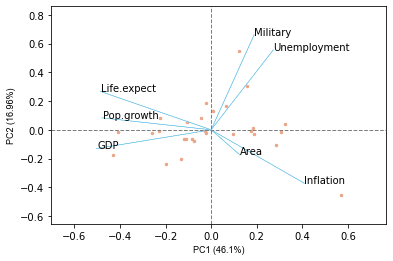

In [77]:
cluster.biplot(cscore=PC, loadings=pca.components_, labels=df.columns, 
    var1=round(pca.explained_variance_ratio_[0]*100, 2), var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True)

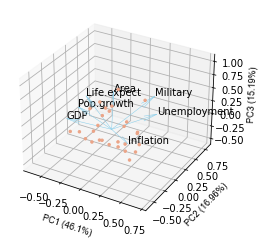

In [76]:
cluster.biplot(cscore=PC, loadings=pca.components_, labels=df.columns, 
    var1=round(pca.explained_variance_ratio_[0]*100, 2), var2=round(pca.explained_variance_ratio_[1]*100, 2), 
    var3=round(pca.explained_variance_ratio_[2]*100, 2),show=True)
